<h1 align="center">WORKOUT ACTIVITY PREDICTIVE MODELS</h1>
<h3 align="center">Regression, Classification and Clustering</h3>
<br>
<br>
<center>Practical Assignment</center>
<center>A240A0050 Big Data in Business and Industry</center>
<center>Autumn 2022</center>
<center>Authors: Thanh Tran (000285359), Nghia Nguyen (000275466)</center>

A dataset containing tracking **workout details** belonging to one person for the period from 2017 to 2020 with **3456 events** recorded with a sport tracking software named Endomondo has been offered for this project.

The modelling goal is to construct a **predictive model** which is capable to suggest the exercise type, time and duration of the next workout event.

In order to accomplish the modelling goal, **three alternatives** have been implemented and compared in terms of  performance, optimization, computation efficiency, degree of complexity, time efficiency... One alternative will be concluded as our **final model**.

## Modelling Plan

This project aims at generating **ONE FINAL PREDICTIVE MODEL** to predict the **exercise type, time** and **duration** of the person's **next workout event**.

- Alternative 1: Using all variables without NaN (9 original variables) with **No movement patterns** considered => KNN classifier, Linear Regressor
- Alternative 2: Using all variables with filled values and **2D (latitude, longtitude) movement patterns** => KNN classifier, Linear Regressor
- Alternative 3: Using all variables with filled values and **3D (latitude, longtitude, altitude) movement patterns** => KNN classifier, Linear Regressor
- Decision on the most optimal model => **FINAL MODEL**

## Source code

* The repository to the project is made public and can be accessed from [HERE](https://github.com/Thanhtrannd/WorkoutBigDataPredictiveModel.git)  


## Procedure

* Data Exploration (JSON Data Loading, Plotting)
* Data Pretreatment (Checking & Filling NaN values, One-hot encoding, Data Normalization)
* Feature Engineering (Data Mining, timeseries shifting, Data Transformation)
* Model Construction (KNN Classifier, Linear Regressor)
* Final Model Selection

##  Introduction

Clustering methods partition a dataset consisting of $m$ data points $\mathbf{x}^{(i)} \in \mathbb{R}^{n}$, into a small number of groups or "clusters" $\mathcal{C}_{1},\ldots,\mathcal{C}_{k}$. Each cluster $\mathcal{C}_{l}$ represents a subset of data points which are more similar to each other than to data points in another cluster. The precise meaning of two data points being "similar" depends on the application at hand. 

Clustering methods do not require labeled data and can be applied to data points characterized solely by its features $\mathbf{x}^{(i)}$. Therefore, clustering methods are an example of **unsupervised machine learning methods**. However, clustering methods are also used in combination (e.g., as a preprocessing step) with supervised learning methods such as regression or classification. 

Clustering methods are roughly divided into two groups:

* Hard clustering methods that assign each data point to exactly one cluster and 
* Soft clustering methods that assign each data point to several different clusters with varying degrees of belonging.

Hard clustering can be interpreted as a special case of soft-clustering where the degrees of belonging are enforced to be either 0 (not belonging) or 1 (belongs). 

This notebook will consider one popular method for hard clustering, the k-means algorithm, and one popular method for soft clustering based on a probabilistic Gaussian mixture model (GMM). These two methods use a notion of similarity that is tied to the Euclidean geometry of $\mathbb{R}^{n}$. 

The notebook also presents the DBSCAN algorithm, which is a hard clustering method that uses a non-Euclidean notion of similarity to cluster the data points. 

## The Data

Our data has been offered in form of a separate JSON file for each workout event. The tracking data comes from 2 sources which are auto-tracking and manual input. That causes inconsistency in the raw data with a plethora of NaN values for several features.

Therefore, the data after loading has yet been ready for model construction, so several steps of exploration and pretreatment need to be carried out.

## Data Exploration

<a id='handsondata'></a>
<div class=" alert alert-info">
    <b>Step 1:</b> Loading the Data. 
 
The following code loads and transforms the dataset into a neat pandas dataframe which is saved into a csv file named `"df_res.csv"`, in which each row represents a data point and each column a feature.
The loading step can be commented out to save computational power and time consumption for reloading 3456 JSON files.
</div>

In [382]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import string
import re
#import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

import joblib

# # Define helper function for data loading and locating to one data frame
# def read_file_to_df(filename):
#     """ Created by h17163,
#         start and end latitude and longitude loading modified by Thanh Tran
#     """
#     data = pd.read_json(filename, typ='series')
#     value = []
#     key = []
#     for j in list(range(0, data.size)):
#         if list(data[j].keys())[0] != 'points':
#             key.append(list(data[j].keys())[0])
#             value.append(list(data[j].items())[0][1])
#             dictionary = dict(zip(key, value))
       

#     if list(data[j].keys())[0] == 'points':
#         try:
#             # start = list(list(list(data[data.size-1].items()))[0][1][0][0].items())[0][1][0]
#             # dictionary['start_lat'] = list(start[0].items())[0][1]
#             # dictionary['start_long'] = list(start[1].items())[0][1]
#             # dictionary['end_lat'] = list(start[0].items())[0][1]
#             # dictionary['end_long'] = list(start[1].items())[0][1]
#             points = list(data[j].items())[0][1]
#             start = points[0]
#             end = points[-1]
#             start_loc = start[0]['location']
#             end_loc = end[0]['location']
#             dictionary['start_lat'] = start_loc[0][0]['latitude']
#             dictionary['start_long'] = start_loc[0][1]['longitude']
#             dictionary['end_lat'] = end_loc[0][0]['latitude']
#             dictionary['end_long'] = end_loc[0][1]['longitude']
            
#         except:
#             print('No detailed data recorded')
            
        
#     df = pd.DataFrame(dictionary, index = [0])

#     return df

# # Load JSON data files from data folder @author: h17163
# folder = 'WorkoutData_2017to2020'
# file_list = os.listdir(folder)

# # Create Empty DataFrame @author: h17163
# df_res = pd.DataFrame()

# # Read files to a common dataframe @author: h17163
# for filename in file_list:
#     print('\n'+ filename)
#     df_process = read_file_to_df(folder + '/' + filename)
#     df_res = pd.concat([df_res, df_process], 0)

# df_res.reset_index(drop=True, inplace = True)

# # Save loaded data frame into "./data/df_res.csv"
# df_res.to_csv('data/df_res.csv', index = False)

# Read in data from the csv file and store it in the data matrix df_rex.
df_res = pd.read_csv("./data/df_res.csv")

# Display first 5 rows
print("First five datapoints:")
display(df_res.head(5))

# Acknowledge the number of variables (columns) and observations (rows)
df_res_cols = list(df_res.columns)  # columns of df_res
[df_res_nObs, df_res_nCol] = df_res.shape  # number of columns
print(f"The dataframe \"df_res\" has {df_res_nCol} variables (columns) and {df_res_nObs} observations (rows).")


First five datapoints:


,sport,source,created_date,start_time,end_time,duration_s,distance_km,calories_kcal,altitude_min_m,altitude_max_m,speed_avg_kmh,speed_max_kmh,ascend_m,descend_m,start_lat,start_long,end_lat,end_long,hydration_l
0,WALKING,TRACK_MOBILE,2017-01-01 08:54:23.0,2017-01-01 08:53:04.0,2017-01-01 09:27:49.0,2084,2.15,171.651,145.5,198.0,3.714012,6.3,78.0,77.0,64.231747,27.729461,64.231976,27.729551,NaN
1,WEIGHT_TRAINING,INPUT_MANUAL_MOBILE,2017-01-01 15:02:04.0,2017-01-01 14:01:00.0,2017-01-01 14:41:00.0,2400,0.00,393.333,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,WALKING,TRACK_MOBILE,2017-01-01 17:47:03.0,2017-01-01 17:46:00.0,2017-01-01 18:12:07.0,1566,1.69,132.168,126.5,174.5,3.885057,5.4,28.0,34.5,64.231885,27.729526,64.231758,27.729491,NaN
3,WALKING,TRACK_MOBILE,2017-01-02 08:57:23.0,2017-01-02 08:55:52.0,2017-01-02 09:26:06.0,1812,2.07,157.828,81.0,201.0,4.112583,6.3,119.5,47.5,64.231953,27.729530,64.231829,27.729530,NaN
4,RUNNING,TRACK_MOBILE,2017-01-02 16:20:51.0,2017-01-02 16:13:34.0,2017-01-02 16:54:52.0,2444,5.87,591.404,97.5,159.5,8.646481,12.6,137.5,140.5,64.231735,27.729492,64.232033,27.729567,NaN


The dataframe "df_res" has 19 variables (columns) and 3456 observations (rows).


<a id='handsondata'></a>
<div class=" alert alert-info">
    <b>Step 2:</b> Plotting the Data (Duration against Time of each exercise type)

The data is plotted in a scatter plot using the custom helper function `plotting` for plotting a scatter plot of a dataset with or without clusters.
</div>

In [383]:
def plotting(data, centroids=None, clusters=None, title='Data', show=True):
    # This function will later on be used for plotting the clusters and centroids. But now we use it to just make a scatter plot of the data
    # Input: the data as an array, cluster means (centroids), cluster assignemnts in {0,1,...,k-1}   
    # Output: a scatter plot of the data in the clusters with cluster means
    plt.figure(figsize=(8,6))
    data_colors = ['orangered', 'dodgerblue', 'springgreen']
    centroid_colors = ['red', 'darkblue', 'limegreen'] # Colors for the centroids
    plt.style.use('ggplot')
    plt.title(title)
    plt.xlabel("feature $x_1$: customers' age")
    plt.ylabel("feature $x_2$: money spent during visit")

    alp = 0.5             # data points alpha
    dt_sz = 20            # marker size for data points 
    cent_sz = 130         # centroid sz 
    
    if centroids is None and clusters is None:
        plt.scatter(data[:,0], data[:,1], s=dt_sz, alpha=alp, c=data_colors[0])
    if centroids is not None and clusters is None:
        plt.scatter(data[:,0], data[:,1], s=dt_sz, alpha=alp, c=data_colors[0])
        plt.scatter(centroids[:,0], centroids[:,1], marker="x", s=cent_sz, c=centroid_colors[:len(centroids)])
    if centroids is not None and clusters is not None:
        plt.scatter(data[:,0], data[:,1], c=[data_colors[i] for i in clusters], s=dt_sz, alpha=alp)
        plt.scatter(centroids[:,0], centroids[:,1], marker="x", c=centroid_colors[:len(centroids)], s=cent_sz)
    if centroids is None and clusters is not None:
        plt.scatter(data[:,0], data[:,1], c=[data_colors[i] for i in clusters], s=dt_sz, alpha=alp)
    
    if show:
        plt.show()

# Extract Cluster indices

# Compute centroids of clusters (sport types)

# Plot the (unclustered) data
#plotting(X)   

## Data Pretreatment

<a id='handsondata'></a>
<div class=" alert alert-info">
    <b>Step 1:</b> Converting variables to datetime data type and sort dataset ascending by "start_time"
 
To ease the computation on time-related variables, they are converted to datetime format.
</div>

In [384]:
# Convert time variable to datetime format
df_res["created_date"] = pd.to_datetime(df_res["created_date"])
df_res["start_time"] = pd.to_datetime(df_res["start_time"])
df_res["end_time"] = pd.to_datetime(df_res["end_time"])

# Sort dataset by variable "start_time" and reset index
df_res.sort_values(by="start_time", ascending = True, inplace = True)
df_res.reset_index(drop = True, inplace = True)

df_res.to_csv("data/df_res_sorted.csv", index = False)

# Convert object-typed variables to string
df_res["sport"] = df_res["sport"].astype('string')
df_res["source"] = df_res["source"].astype('string')

# Display first 5 rows
print("First five datapoints:")
display(df_res.head(5))
df_res.info()

First five datapoints:


,sport,source,created_date,start_time,end_time,duration_s,distance_km,calories_kcal,altitude_min_m,altitude_max_m,speed_avg_kmh,speed_max_kmh,ascend_m,descend_m,start_lat,start_long,end_lat,end_long,hydration_l
0,WALKING,TRACK_MOBILE,2017-01-01 08:54:23,2017-01-01 08:53:04,2017-01-01 09:27:49,2084,2.15,171.651,145.5,198.0,3.714012,6.3,78.0,77.0,64.231747,27.729461,64.231976,27.729551,NaN
1,WEIGHT_TRAINING,INPUT_MANUAL_MOBILE,2017-01-01 15:02:04,2017-01-01 14:01:00,2017-01-01 14:41:00,2400,0.00,393.333,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,WALKING,TRACK_MOBILE,2017-01-01 17:47:03,2017-01-01 17:46:00,2017-01-01 18:12:07,1566,1.69,132.168,126.5,174.5,3.885057,5.4,28.0,34.5,64.231885,27.729526,64.231758,27.729491,NaN
3,WALKING,TRACK_MOBILE,2017-01-02 08:57:23,2017-01-02 08:55:52,2017-01-02 09:26:06,1812,2.07,157.828,81.0,201.0,4.112583,6.3,119.5,47.5,64.231953,27.729530,64.231829,27.729530,NaN
4,RUNNING,TRACK_MOBILE,2017-01-02 16:20:51,2017-01-02 16:13:34,2017-01-02 16:54:52,2444,5.87,591.404,97.5,159.5,8.646481,12.6,137.5,140.5,64.231735,27.729492,64.232033,27.729567,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3456 entries, 0 to 3455
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   sport           3456 non-null   string        
 1   source          3456 non-null   string        
 2   created_date    3456 non-null   datetime64[ns]
 3   start_time      3456 non-null   datetime64[ns]
 4   end_time        3456 non-null   datetime64[ns]
 5   duration_s      3456 non-null   int64         
 6   distance_km     3456 non-null   float64       
 7   calories_kcal   3455 non-null   float64       
 8   altitude_min_m  3048 non-null   float64       
 9   altitude_max_m  3048 non-null   float64       
 10  speed_avg_kmh   3456 non-null   float64       
 11  speed_max_kmh   3043 non-null   float64       
 12  ascend_m        3045 non-null   float64       
 13  descend_m       3045 non-null   float64       
 14  start_lat       3033 non-null   float64       
 15  star

<a id='handsondata'></a>
<div class=" alert alert-info">
    <b>Step 2:</b> Checking NaN
 
The code snippet below checks the number of NaN values of each feature
</div>

In [385]:
# Count NaN values of each feature
print("NaN Counting...")
print("<Feature>: <Number of NaN values>")
df_res_nNaN = dict()  # Initialize list of number of NaN values in corresponding columns
df_res_cols = list(df_res.columns)  # columns of df_res
[df_res_nObs, df_res_nCol] = df_res.shape

for col in df_res_cols:
    df_res_nNaN[col] = df_res[col].isnull().sum()
    print(f"{col}: {df_res_nNaN[col]}")

NaN Counting...
<Feature>: <Number of NaN values>
sport: 0
source: 0
created_date: 0
start_time: 0
end_time: 0
duration_s: 0
distance_km: 0
calories_kcal: 1
altitude_min_m: 408
altitude_max_m: 408
speed_avg_kmh: 0
speed_max_kmh: 413
ascend_m: 411
descend_m: 411
start_lat: 423
start_long: 423
end_lat: 423
end_long: 423
hydration_l: 922


<a id='handsondata'></a>
<div class=" alert alert-info">
    <b>Step 3:</b> Fill NaN for variable "calories_kcal"
</div>

There is **only ONE NaN** value in the `"calories_kcal"` column and that NaN can easily be filled based on the average calorie burn rate of the corresponding exercise type. Therefore, the below code snippet aims at filling that NaN of that observation.

In [386]:
# Find exercise type of the observation having that NaN
obs_idx = df_res.loc[pd.isna(df_res["calories_kcal"]), :].index
obs_idx = obs_idx.tolist()[0]
obs_idx_sport = df_res.iloc[obs_idx]['sport']
print(f"The observation {obs_idx} having NaN value in the \"calories_kcal\" column has exercise type being \"{obs_idx_sport}\".")

# Calculate calorie burn rate of that sport
df_res_NaNsport = df_res[df_res['sport']==obs_idx_sport][["sport", "calories_kcal", "duration_s"]]
df_res_NaNsport['calorie burn rate'] = df_res_NaNsport['calories_kcal'] / df_res_NaNsport['duration_s']
mean_walking_calorie_burn_rate = df_res_NaNsport['calorie burn rate'].mean()
display(df_res_NaNsport.head(5))

# Fill location data (Latitude, Longtitude)
mean_NaNsport_calorie_burn_rate = df_res_NaNsport['calorie burn rate'].mean()
df_res.loc[obs_idx, "calories_kcal"] = mean_NaNsport_calorie_burn_rate
print(f"The average calorie burn rate of {obs_idx_sport} is {mean_NaNsport_calorie_burn_rate}, which replaces the NaN value in of the observation {obs_idx}.")

# Check NaN existence
nNaN = df_res["calories_kcal"].isnull().sum()
print(f"The number of NaN values in column \"calories_kcal\" is {nNaN}")

The observation 3150 having NaN value in the "calories_kcal" column has exercise type being "WALKING".


,sport,calories_kcal,duration_s,calorie burn rate
0,WALKING,171.651,2084,0.082366
2,WALKING,132.168,1566,0.084398
3,WALKING,157.828,1812,0.087102
5,WALKING,167.024,1963,0.085086
7,WALKING,178.907,1927,0.092842


The average calorie burn rate of WALKING is 0.10086510083945138, which replaces the NaN value in of the observation 3150.
The number of NaN values in column "calories_kcal" is 0


<a id='handsondata'></a>
<div class=" alert alert-info">
    <b>Step 4:</b> Fill NaN for location variables "start_lat", "start_long", "end_lat" and "end_long"
</div>

Filling the **other NaN** is a little **trickier** and might involve **some assumptions**.
We assume that the person cannot be too far away from the location he/she was tracked for the most previous or following event. Therefore, 4 variables `"start_lat", "start_long", "end_lat" and "end_long"`, each of which has **423 NaN values**, will **be filled** by replicating the values of either the **most previous or the following observation**'s corresponding variables' value depending on which observation ever has the **least time difference** of the `"start_time"` compared to the observation of interest.

In [387]:
# Define a list of location variables
loc_vars = ["start_lat", "start_long", "end_lat", "end_long"]
for var in loc_vars:
    # Find indices of observations with NaN values
    obs_idx_ls = df_res.loc[pd.isna(df_res[var]), :].index.tolist()
    for obs_idx in obs_idx_ls:
        # If this is the first event, consider only the following event
        if obs_idx == 0:
            fol_i = 1
            while True:
                fol_i_var = df_res.loc[obs_idx + fol_i, var]
                if not pd.isna(fol_i_var):
                    break
                fol_i += 1
            
            df_res.loc[obs_idx, var] = df_res.loc[obs_idx + fol_i, var]

        # If this is the last event, consider only the previous event
        elif obs_idx == df_res_nObs - 1:
            pre_i = 1
            while True:
                pre_i_var = df_res.loc[obs_idx - pre_i, var]
                if not pd.isna(pre_i_var):
                    break
                pre_i += 1
            
            df_res.loc[obs_idx, var] = df_res.loc[obs_idx - pre_i, var]
        
        else:            
            # Check if previous or following is also NaN then increment the index
            pre_i = 1
            while True:
                pre_i_var = df_res.loc[obs_idx - pre_i, var]
                if not pd.isna(pre_i_var):
                    break
                pre_i += 1

            fol_i = 1
            while True:
                fol_i_var = df_res.loc[obs_idx + fol_i, var]
                if not pd.isna(fol_i_var):
                    break
                fol_i += 1

            # Compute time difference between the start time values
            pre_diff = (df_res.loc[obs_idx, "start_time"] - df_res.loc[obs_idx - pre_i, "start_time"]).total_seconds()
            fol_diff = (df_res.loc[obs_idx + fol_i, "start_time"] - df_res.loc[obs_idx, "start_time"]).total_seconds()
            # Fill NaN with the considered observation having less time difference
            if pre_diff < fol_diff:
                df_res.loc[obs_idx, var] = df_res.loc[obs_idx - pre_i, var]
            else:
                df_res.loc[obs_idx, var] = df_res.loc[obs_idx + fol_i, var]

# Display first 5 rows
print("First five datapoints:")
display(df_res.head(5))

# Check NaN existence
for var in loc_vars:
    nNaN = df_res[var].isnull().sum()
    print(f"The number of NaN values in column {var} is {nNaN}")

First five datapoints:


,sport,source,created_date,start_time,end_time,duration_s,distance_km,calories_kcal,altitude_min_m,altitude_max_m,speed_avg_kmh,speed_max_kmh,ascend_m,descend_m,start_lat,start_long,end_lat,end_long,hydration_l
0,WALKING,TRACK_MOBILE,2017-01-01 08:54:23,2017-01-01 08:53:04,2017-01-01 09:27:49,2084,2.15,171.651,145.5,198.0,3.714012,6.3,78.0,77.0,64.231747,27.729461,64.231976,27.729551,NaN
1,WEIGHT_TRAINING,INPUT_MANUAL_MOBILE,2017-01-01 15:02:04,2017-01-01 14:01:00,2017-01-01 14:41:00,2400,0.00,393.333,NaN,NaN,0.000000,NaN,NaN,NaN,64.231885,27.729526,64.231758,27.729491,NaN
2,WALKING,TRACK_MOBILE,2017-01-01 17:47:03,2017-01-01 17:46:00,2017-01-01 18:12:07,1566,1.69,132.168,126.5,174.5,3.885057,5.4,28.0,34.5,64.231885,27.729526,64.231758,27.729491,NaN
3,WALKING,TRACK_MOBILE,2017-01-02 08:57:23,2017-01-02 08:55:52,2017-01-02 09:26:06,1812,2.07,157.828,81.0,201.0,4.112583,6.3,119.5,47.5,64.231953,27.729530,64.231829,27.729530,NaN
4,RUNNING,TRACK_MOBILE,2017-01-02 16:20:51,2017-01-02 16:13:34,2017-01-02 16:54:52,2444,5.87,591.404,97.5,159.5,8.646481,12.6,137.5,140.5,64.231735,27.729492,64.232033,27.729567,NaN


The number of NaN values in column start_lat is 0
The number of NaN values in column start_long is 0
The number of NaN values in column end_lat is 0
The number of NaN values in column end_long is 0


<a id='handsondata'></a>
<div class=" alert alert-info">
    <b>Step 5:</b> Fill  NaN of variable "speed_max_kmh"
</div>

Due to varible `"speed_max_kmh"` having missing values and no patterns found, the procedure to fill data for this variables follow **multiple rules of logic** and we try to keep it aligned with the most intuitive logic.

In [388]:
# Remove impossibly high speed observation
print("Speed-related outlier removal ...")
df_res_sorted_speed = df_res[["sport", "speed_avg_kmh", "speed_max_kmh"]].sort_values(by = "speed_max_kmh", ascending = False)
display(df_res_sorted_speed.head(20))

df_res_groupby_sport = df_res.groupby("sport")
sport_idx = df_res_groupby_sport.indices
removed_obs = []
for sport in sport_idx:
    if sport == "CYCLING_SPORT":
        fastest_speed = 296.009
    elif sport == "ICE_SKATING":
        fastest_speed = 103
    elif sport in ["RUNNING", "RUNNING_CANICROSS", "WALKING", "SKIING_CROSS_COUNTRY"]:
        fastest_speed = 44.72
    else:
        continue
    
    idx_ls = sport_idx[sport]
    for i in idx_ls:
        if df_res.loc[i, "speed_max_kmh"] > fastest_speed:
            df_res = df_res.drop([i], axis = 0)
            removed_obs.append(i)

df_res.reset_index(drop = True, inplace = True)

print("Because of the fact that in reality the fastest ever recorded speed of \"CYCLING\" is 296.009 km/h, any observation having speed above that threshold is removed.")
print("Because of the fact that in reality the fastest ever recorded speed of \"ICE SKATING\" is 103 km/h, any observation having speed above that threshold is removed.")
print("Because of the fact that in reality the fastest ever recorded speed of \"RUNNING\" is 44.72km/h, any observation having speed above that threshold is removed.")
print(f"List of removed observation (total {len(removed_obs)} observations): {removed_obs}")

# Compute mean and max value per sport of variable "speed_avg_kmh"
df_res_groupby_sport = df_res.groupby("sport")
df_res_groupby_sport_speed_avg_mean = df_res_groupby_sport.agg({'speed_avg_kmh': 'mean'})
df_res_groupby_sport_speed_avg_max = df_res_groupby_sport.agg({'speed_avg_kmh': 'max'})
df_res_groupby_sport_speed_avg = pd.concat([df_res_groupby_sport_speed_avg_mean, df_res_groupby_sport_speed_avg_max], keys = ['sport', 'sport'], axis = 1)
df_res_groupby_sport_speed_avg.columns = ["mean_speed_avg_kmh", "max_speed_avg_kmh"]

# Compute mean and max value per sport of variable "speed_max_kmh"
df_res_groupby_sport_speed_max_mean = df_res_groupby_sport.agg({'speed_max_kmh': 'mean'})
df_res_groupby_sport_speed_max_max = df_res_groupby_sport.agg({'speed_max_kmh': 'max'})
df_res_groupby_sport_speed_max = pd.concat([df_res_groupby_sport_speed_max_mean, df_res_groupby_sport_speed_max_max], keys = ['sport', 'sport'], axis = 1)
df_res_groupby_sport_speed_max.columns = ["mean_speed_max_kmh", "max_speed_max_kmh"]

# Concatenate the two above dataframe with aggregate speed
df_res_groupby_sport_speed = pd.concat([df_res_groupby_sport_speed_avg, df_res_groupby_sport_speed_max], keys = ['sport', 'sport'], axis = 1)
df_res_groupby_sport_speed.columns = ["mean_speed_avg_kmh", "max_speed_avg_kmh", "mean_speed_max_kmh", "max_speed_max_kmh"]
display(df_res_groupby_sport_speed)

# Fill NaN per sport
epsilon = 0.00000000001
sport_idx = df_res_groupby_sport.indices
for sport in sport_idx:
    sport_mean_speed_avg = df_res_groupby_sport_speed.loc[sport, "mean_speed_avg_kmh"]
    sport_max_speed_avg = df_res_groupby_sport_speed.loc[sport, "max_speed_avg_kmh"]
    sport_mean_speed_max = df_res_groupby_sport_speed.loc[sport, "mean_speed_max_kmh"]
    sport_max_speed_max = df_res_groupby_sport_speed.loc[sport, "max_speed_max_kmh"]

    if pd.isna(sport_mean_speed_max) and pd.isna(sport_max_speed_max):
        replace_value = sport_max_speed_avg
    else:
        replace_value = sport_mean_speed_max 
    
    idx_ls = sport_idx[sport]
    for i in idx_ls:
        if pd.isna(df_res.loc[i, "speed_max_kmh"]):
            df_res.loc[i, "speed_max_kmh"] = replace_value

# Check NaN existence
nNaN = df_res["speed_max_kmh"].isnull().sum()
print(f"The number of NaN values in column \"speed_max_kmh\" is {nNaN}")

Speed-related outlier removal ...


,sport,speed_avg_kmh,speed_max_kmh
1359,CYCLING_SPORT,16.003489,682.2190
1351,CYCLING_SPORT,19.633608,602.4600
1385,CYCLING_SPORT,16.871275,595.2490
1336,CYCLING_SPORT,16.068071,552.1550
1066,ICE_SKATING,9.804720,487.0480
1272,RUNNING,7.726175,334.0810
1210,RUNNING_CANICROSS,8.641583,325.8400
1091,ICE_SKATING,9.811507,307.2120
1035,WALKING,4.810718,297.0030
987,SKIING_CROSS_COUNTRY,10.420710,279.4690


Because of the fact that in reality the fastest ever recorded speed of "CYCLING" is 296.009 km/h, any observation having speed above that threshold is removed.
Because of the fact that in reality the fastest ever recorded speed of "ICE SKATING" is 103 km/h, any observation having speed above that threshold is removed.
Because of the fact that in reality the fastest ever recorded speed of "RUNNING" is 44.72km/h, any observation having speed above that threshold is removed.
List of removed observation (total 32 observations): [1336, 1351, 1359, 1385, 1066, 1091, 1272, 1274, 1210, 987, 1840, 28, 406, 438, 484, 524, 573, 578, 586, 652, 938, 1019, 1029, 1035, 1132, 1456, 1530, 1607, 2257, 2528, 2602, 3072]


,mean_speed_avg_kmh,max_speed_avg_kmh,mean_speed_max_kmh,max_speed_max_kmh
sport,,,,
BADMINTON,0.394737,5.000000,NaN,NaN
BEACH_VOLLEY,5.026569,5.026569,10.377800,10.3778
CROSSFIT,0.012333,0.110997,3.600000,3.6000
CROSS_TRAINING,0.000000,0.000000,NaN,NaN
CYCLING_SPORT,14.549718,20.407730,38.443148,145.4460
CYCLING_TRANSPORTATION,13.295340,19.320688,35.150104,48.2768
FITNESS_WALKING,3.750550,3.750550,8.100000,8.1000
ICE_SKATING,8.920657,11.313119,29.868158,40.5403
ROLLER_SKATING,8.615051,11.202263,24.900000,27.0000


The number of NaN values in column "speed_max_kmh" is 0


<a id='handsondata'></a>
<div class=" alert alert-info">
    <b>Step 6:</b> Fill NaN of variable "hydration_l"
</div>

The NaN values of the variable `"hydration_l"` are filled with the average value of corresponding exercise type.

In [389]:
# Compute mean hydration value per sport
df_res_groupby_sport_hydraMean = df_res_groupby_sport.agg({'hydration_l': 'mean'})

# Assume that the hydration of ice_skating and roller_skating is the same
df_res_groupby_sport_hydraMean.loc["ROLLER_SKATING", "hydration_l"] = df_res_groupby_sport_hydraMean.loc["ICE_SKATING", "hydration_l"]

# Assume that the hydration of fitness_walking is in-between that of walking and running
df_res_groupby_sport_hydraMean.loc["FITNESS_WALKING", "hydration_l"] = (df_res_groupby_sport_hydraMean.loc["WALKING", "hydration_l"] + df_res_groupby_sport_hydraMean.loc["RUNNING", "hydration_l"]) / 2

# Display the computed means
display(df_res_groupby_sport_hydraMean)

# Fill NaN per sport
sport_idx = df_res_groupby_sport.indices
for sport in sport_idx:
    idx_ls = sport_idx[sport]
    for i in idx_ls:
        if pd.isna(df_res.loc[i, "hydration_l"]):
            df_res.loc[i, "hydration_l"] = df_res_groupby_sport_hydraMean.loc[sport, "hydration_l"]

# Check NaN existence
nNaN = df_res["hydration_l"].isnull().sum()
print(f"The number of NaN values in column \"hydration_l\" is {nNaN}")

,hydration_l
sport,
BADMINTON,0.265088
BEACH_VOLLEY,0.226187
CROSSFIT,0.102779
CROSS_TRAINING,0.082855
CYCLING_SPORT,0.281130
CYCLING_TRANSPORTATION,0.090818
FITNESS_WALKING,0.209218
ICE_SKATING,0.208603
ROLLER_SKATING,0.208603


The number of NaN values in column "hydration_l" is 0


<a id='handsondata'></a>
<div class=" alert alert-info">
    <b>Step 7:</b> Remove redundant variables
</div>

At this state of investigation, we consider 4 variables namely `"altitude_min_m", "altitude_max_m", "ascend_m" and "descend_m"` redundant and highly correlated. Therefore, we remove them from the dataframe. In the third alternative model, altitude shall be taken into account.

In [390]:
df_res = df_res.drop(["altitude_min_m", "altitude_max_m", "ascend_m", "descend_m"], axis=1)

# Display first 5 rows
print("First five datapoints:")
display(df_res.head(5))
df_res.info()

First five datapoints:


,sport,source,created_date,start_time,end_time,duration_s,distance_km,calories_kcal,speed_avg_kmh,speed_max_kmh,start_lat,start_long,end_lat,end_long,hydration_l
0,WALKING,TRACK_MOBILE,2017-01-01 08:54:23,2017-01-01 08:53:04,2017-01-01 09:27:49,2084,2.15,171.651,3.714012,6.3,64.231747,27.729461,64.231976,27.729551,0.132893
1,WEIGHT_TRAINING,INPUT_MANUAL_MOBILE,2017-01-01 15:02:04,2017-01-01 14:01:00,2017-01-01 14:41:00,2400,0.00,393.333,0.000000,2.4,64.231885,27.729526,64.231758,27.729491,0.202580
2,WALKING,TRACK_MOBILE,2017-01-01 17:47:03,2017-01-01 17:46:00,2017-01-01 18:12:07,1566,1.69,132.168,3.885057,5.4,64.231885,27.729526,64.231758,27.729491,0.132893
3,WALKING,TRACK_MOBILE,2017-01-02 08:57:23,2017-01-02 08:55:52,2017-01-02 09:26:06,1812,2.07,157.828,4.112583,6.3,64.231953,27.729530,64.231829,27.729530,0.132893
4,RUNNING,TRACK_MOBILE,2017-01-02 16:20:51,2017-01-02 16:13:34,2017-01-02 16:54:52,2444,5.87,591.404,8.646481,12.6,64.231735,27.729492,64.232033,27.729567,0.285542


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   sport          3424 non-null   string        
 1   source         3424 non-null   string        
 2   created_date   3424 non-null   datetime64[ns]
 3   start_time     3424 non-null   datetime64[ns]
 4   end_time       3424 non-null   datetime64[ns]
 5   duration_s     3424 non-null   int64         
 6   distance_km    3424 non-null   float64       
 7   calories_kcal  3424 non-null   float64       
 8   speed_avg_kmh  3424 non-null   float64       
 9   speed_max_kmh  3424 non-null   float64       
 10  start_lat      3424 non-null   float64       
 11  start_long     3424 non-null   float64       
 12  end_lat        3424 non-null   float64       
 13  end_long       3424 non-null   float64       
 14  hydration_l    3424 non-null   float64       
dtypes: datetime64[ns](3),

<a id='handsondata'></a>
<div class=" alert alert-info">
    <b>Step 8:</b> Save the pretreated dataframe to csv file
</div>


The resulting dataset is saved into a csv file named `"./data/df_res_filled.csv"`, in which each row represents a data point and each column a feature.

In [391]:
df_res_cols = list(df_res.columns)  # columns of df_res
[df_res_nObs, df_res_nCol] = df_res.shape

df_res.to_csv("data/df_res_filled.csv", index = False)
print(f"After pretreatment, the resulting dataset has {df_res_nCol} variables (columns) and {df_res_nObs} observations (rows)")

After pretreatment, the resulting dataset has 15 variables (columns) and 3424 observations (rows)


<a id='handsondata'></a>
<div class=" alert alert-info">
    <b>Step 9:</b> Rechecking NaN
 
The code snippet below checks the number of NaN values of each feature
</div>

In [392]:
# Count NaN values of each feature
print("NaN Counting...")
print("<Feature>: <Number of NaN values>")
df_res_nNaN = dict()  # Initialize list of number of NaN values in corresponding columns
df_res_cols = list(df_res.columns)  # columns of df_res
[df_res_nObs, df_res_nCol] = df_res.shape

for col in df_res_cols:
    df_res_nNaN[col] = df_res[col].isnull().sum()
    print(f"{col}: {df_res_nNaN[col]}")

NaN Counting...
<Feature>: <Number of NaN values>
sport: 0
source: 0
created_date: 0
start_time: 0
end_time: 0
duration_s: 0
distance_km: 0
calories_kcal: 0
speed_avg_kmh: 0
speed_max_kmh: 0
start_lat: 0
start_long: 0
end_lat: 0
end_long: 0
hydration_l: 0


## Feature Engineering

This stage aims at converting and transforming data to a consistent format for model construction.

<a id='handsondata'></a>
<div class=" alert alert-info">
    <b>Step 1:</b> Converting datetime variable "created_date" to float
</div>

In [393]:
df = df_res

# Convert to numeric
df["created_date_num"] = df["created_date"].apply(lambda x: x.strftime("%Y%m%d%H%M%S"))
df["created_date_num"] = df["created_date_num"].apply(lambda x: float(x))

# Drop the orginal datetime column
df = df.drop(["created_date"], axis=1)

<a id='handsondata'></a>
<div class=" alert alert-info">
    <b>Step 2:</b> Converting datetime variables "start_time" and "end_time" to categories
</div>

In [394]:
# Converting datetime variable "start_time" to categories
df["start_time_num"] = df["start_time"].apply(lambda x: x.strftime("%Y%m%d%H%M%S"))
df["start_time_num"] = df["start_time_num"].apply(lambda x: float(x))
df["start_time_hms"] = df["start_time"].apply(lambda x: x.strftime("%H%M%S"))
df["start_time_hms"] = df["start_time_hms"].apply(lambda x: float(x))

# Converting datetime variable "end_time" to categories
df["end_time_num"] = df["end_time"].apply(lambda x: x.strftime("%Y%m%d%H%M%S"))
df["end_time_num"] = df["end_time_num"].apply(lambda x: float(x))
df["end_time_hms"] = df["end_time"].apply(lambda x: x.strftime("%H%M%S"))
df["end_time_hms"] = df["end_time_hms"].apply(lambda x: float(x))

# Define categoring thresholds
morning_default_left = 50000
morning_default_right = 105959


afternoon_default_left = 110000
afternoon_default_right = 165959

evening_default_left = 170000
evening_default_right = 225959

# Categorize start_time
df["start_time_cat"] = df["start_time_hms"]

for i in range(0,len(df["start_time_hms"])):
    if morning_default_right >= df.loc[i,"start_time_hms"] >= morning_default_left:
        df.loc[i,"start_time_cat"] = "MORNING"
    elif afternoon_default_right >= df.loc[i,"start_time_hms"] >= afternoon_default_left:
        df.loc[i,"start_time_cat"] = "AFTERNOON"
    elif evening_default_right >= df.loc[i,"start_time_hms"] >= evening_default_left:
        df.loc[i,"start_time_cat"] = "EVENING"
    else:
        df.loc[i,"start_time_cat"] = "NIGHT"

df["start_time_cat"] = df["start_time_cat"].astype('string')

# Categorize end_time
df["end_time_cat"] = df["end_time_hms"]

for i in range(0,len(df["end_time_hms"])):
    if morning_default_right >= df.loc[i,"end_time_hms"] >= morning_default_left:
        df.loc[i,"end_time_cat"] = "MORNING"
    elif afternoon_default_right >= df.loc[i,"end_time_hms"] >= afternoon_default_left:
        df.loc[i,"end_time_cat"] = "AFTERNOON"
    elif evening_default_right >= df.loc[i,"end_time_hms"] >= evening_default_left:
        df.loc[i,"end_time_cat"] = "EVENING"
    else:
        df.loc[i,"end_time_cat"] = "NIGHT"

df["end_time_cat"] = df["end_time_cat"].astype('string')

# Drop the orginal datetime column
df = df.drop(["start_time", "end_time", "start_time_num", "start_time_hms", "end_time_num", "end_time_hms"], axis=1)

#df = df.iloc[:,[-1,-2] + list(range(0,16))]

<a id='handsondata'></a>
<div class=" alert alert-info">
    <b>Step 3:</b> One-hot encoding categorical/ string data variables
</div>

In [395]:
# Create dummy for "sport" variable
sport_dummy = pd.get_dummies(df["sport"], prefix="sport")
sport_dummy_cols = sport_dummy.columns.to_list()

# Create dummy for "source" variable and drop the original "source" column
source_dummy = pd.get_dummies(df["source"], prefix="source")
source_dummy_cols = source_dummy.columns.to_list() 
df = df.drop(["source"], axis = 1)

# Create dummy for "start_time_cat" variable
start_time_cat_dummy = pd.get_dummies(df["start_time_cat"],prefix="start_time_cat")
start_time_cat_dummy_cols = start_time_cat_dummy.columns.to_list()

# Create dummy for "end_time_cat" variable and drop the original "end_time_cat" column because we do not predict end time
end_time_cat_dummy = pd.get_dummies(df["end_time_cat"], prefix="end_time_cat")
end_time_cat_dummy_cols = end_time_cat_dummy.columns.to_list()
df = df.drop(["end_time_cat"], axis = 1)

# Join all dummy columns to the dataframe df
df = pd.concat([df, sport_dummy, source_dummy, start_time_cat_dummy, end_time_cat_dummy], axis = 1)

display(df.head(5))

,sport,duration_s,distance_km,calories_kcal,speed_avg_kmh,speed_max_kmh,start_lat,start_long,end_lat,end_long,...,source_INPUT_MANUAL_MOBILE,source_TRACK_MOBILE,start_time_cat_AFTERNOON,start_time_cat_EVENING,start_time_cat_MORNING,start_time_cat_NIGHT,end_time_cat_AFTERNOON,end_time_cat_EVENING,end_time_cat_MORNING,end_time_cat_NIGHT
0,WALKING,2084,2.15,171.651,3.714012,6.3,64.231747,27.729461,64.231976,27.729551,...,0,1,0,0,1,0,0,0,1,0
1,WEIGHT_TRAINING,2400,0.00,393.333,0.000000,2.4,64.231885,27.729526,64.231758,27.729491,...,1,0,1,0,0,0,1,0,0,0
2,WALKING,1566,1.69,132.168,3.885057,5.4,64.231885,27.729526,64.231758,27.729491,...,0,1,0,1,0,0,0,1,0,0
3,WALKING,1812,2.07,157.828,4.112583,6.3,64.231953,27.729530,64.231829,27.729530,...,0,1,0,0,1,0,0,0,1,0
4,RUNNING,2444,5.87,591.404,8.646481,12.6,64.231735,27.729492,64.232033,27.729567,...,0,1,1,0,0,0,1,0,0,0


<a id='handsondata'></a>
<div class=" alert alert-info">
    <b>Step 4:</b> Normalizing data
</div>

In [396]:
def min_max_normalize(df_, reallocate = True):
    """
    Normalize numeric columns of provided dataframe

    :param dataframe df: dataframe containing columns to be normalized
    :return dataframe df: dataframe with required columns normalized
    """
    numeric_types = ["float", "float64", "int", "int64", "uint8"]
    Cols_Idx = df_.shape[1]
    skipped_cols = []
    normalized_cols = []

    for c in range(Cols_Idx):
        if df_.iloc[:,c].dtype in numeric_types:
            df_.iloc[:,c] = (df_.iloc[:,c]-df_.iloc[:,c].min())/(df_.iloc[:,c].max()-df_.iloc[:,c].min())
            normalized_cols.append(c)
        else:
            skipped_cols.append(c)

    if reallocate:
        df_ = df_.iloc[:, skipped_cols + normalized_cols]

    return df_

df_norm = df.copy()
df_norm = min_max_normalize(df_norm)
display(df_norm.head(5))

,sport,start_time_cat,duration_s,distance_km,calories_kcal,speed_avg_kmh,speed_max_kmh,start_lat,start_long,end_lat,...,source_INPUT_MANUAL_MOBILE,source_TRACK_MOBILE,start_time_cat_AFTERNOON,start_time_cat_EVENING,start_time_cat_MORNING,start_time_cat_NIGHT,end_time_cat_AFTERNOON,end_time_cat_EVENING,end_time_cat_MORNING,end_time_cat_NIGHT
0,WALKING,MORNING,0.124111,0.060566,0.111403,0.013888,0.043315,0.833809,0.936068,0.833813,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,WEIGHT_TRAINING,AFTERNOON,0.142994,0.000000,0.255362,0.000000,0.016501,0.833814,0.936071,0.833805,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,WALKING,EVENING,0.093158,0.047607,0.085763,0.014527,0.037127,0.833814,0.936071,0.833805,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,WALKING,MORNING,0.107858,0.058312,0.102427,0.015378,0.043315,0.833817,0.936071,0.833808,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,RUNNING,AFTERNOON,0.145623,0.165358,0.383988,0.032332,0.086630,0.833809,0.936070,0.833815,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


<a id='handsondata'></a>
<div class=" alert alert-info">
    <b>Step 5:</b> Generate datasets for alternative 1
</div>

In [397]:
SPORT_CLASS_COL = "sport"
TIME_CLASS_COL = "start_time_cat"
DUR_CLASS_COL = "duration_s"

# Create dataset for sport prediction
print("Alt1: Dataset DF1_SPORT for sport prediction")
DF1_SPORT = df_norm.drop(["start_time_cat"], axis = 1)
display(DF1_SPORT.head(5))

# Create dataset for start time prediction
print("Alt1: Dataset DF1_TIME for time prediction")
DF1_TIME = df_norm.drop(["sport"], axis = 1)
display(DF1_TIME.head(5))

# Create dataset for duration prediction
print("Alt1: Dataset DF1_DUR for duration prediction")
DF1_DUR = df_norm.drop(["start_time_cat", "sport"], axis = 1)
DF1_DUR["duration_s"] = df["duration_s"]  # Get original duration values
display(DF1_DUR.head(5))


Alt1: Dataset DF1_SPORT for sport prediction


,sport,duration_s,distance_km,calories_kcal,speed_avg_kmh,speed_max_kmh,start_lat,start_long,end_lat,end_long,...,source_INPUT_MANUAL_MOBILE,source_TRACK_MOBILE,start_time_cat_AFTERNOON,start_time_cat_EVENING,start_time_cat_MORNING,start_time_cat_NIGHT,end_time_cat_AFTERNOON,end_time_cat_EVENING,end_time_cat_MORNING,end_time_cat_NIGHT
0,WALKING,0.124111,0.060566,0.111403,0.013888,0.043315,0.833809,0.936068,0.833813,0.936069,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,WEIGHT_TRAINING,0.142994,0.000000,0.255362,0.000000,0.016501,0.833814,0.936071,0.833805,0.936067,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,WALKING,0.093158,0.047607,0.085763,0.014527,0.037127,0.833814,0.936071,0.833805,0.936067,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,WALKING,0.107858,0.058312,0.102427,0.015378,0.043315,0.833817,0.936071,0.833808,0.936068,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,RUNNING,0.145623,0.165358,0.383988,0.032332,0.086630,0.833809,0.936070,0.833815,0.936069,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


Alt1: Dataset DF1_TIME for time prediction


,start_time_cat,duration_s,distance_km,calories_kcal,speed_avg_kmh,speed_max_kmh,start_lat,start_long,end_lat,end_long,...,source_INPUT_MANUAL_MOBILE,source_TRACK_MOBILE,start_time_cat_AFTERNOON,start_time_cat_EVENING,start_time_cat_MORNING,start_time_cat_NIGHT,end_time_cat_AFTERNOON,end_time_cat_EVENING,end_time_cat_MORNING,end_time_cat_NIGHT
0,MORNING,0.124111,0.060566,0.111403,0.013888,0.043315,0.833809,0.936068,0.833813,0.936069,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,AFTERNOON,0.142994,0.000000,0.255362,0.000000,0.016501,0.833814,0.936071,0.833805,0.936067,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,EVENING,0.093158,0.047607,0.085763,0.014527,0.037127,0.833814,0.936071,0.833805,0.936067,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,MORNING,0.107858,0.058312,0.102427,0.015378,0.043315,0.833817,0.936071,0.833808,0.936068,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,AFTERNOON,0.145623,0.165358,0.383988,0.032332,0.086630,0.833809,0.936070,0.833815,0.936069,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


Alt1: Dataset DF1_DUR for duration prediction


,duration_s,distance_km,calories_kcal,speed_avg_kmh,speed_max_kmh,start_lat,start_long,end_lat,end_long,hydration_l,...,source_INPUT_MANUAL_MOBILE,source_TRACK_MOBILE,start_time_cat_AFTERNOON,start_time_cat_EVENING,start_time_cat_MORNING,start_time_cat_NIGHT,end_time_cat_AFTERNOON,end_time_cat_EVENING,end_time_cat_MORNING,end_time_cat_NIGHT
0,2084,0.060566,0.111403,0.013888,0.043315,0.833809,0.936068,0.833813,0.936069,0.172584,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,2400,0.000000,0.255362,0.000000,0.016501,0.833814,0.936071,0.833805,0.936067,0.263222,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1566,0.047607,0.085763,0.014527,0.037127,0.833814,0.936071,0.833805,0.936067,0.172584,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1812,0.058312,0.102427,0.015378,0.043315,0.833817,0.936071,0.833808,0.936068,0.172584,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,2444,0.165358,0.383988,0.032332,0.086630,0.833809,0.936070,0.833815,0.936069,0.371127,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


<a id='handsondata'></a>
<div class=" alert alert-info">
    <b>Step 6:</b> Shifting timeseries
</div>

In [398]:
def past_time_shift(df_, classCol, nEvents, to_numpy_ = True, Xfilename=None, Yfilename=None):
    df_Y = df_[classCol]
    df_X = df_.drop([classCol], axis = 1)
    Cols_X = list(df_X.columns)
    
    for c in Cols_X:
        for e in range(1, nEvents + 1): 
            name = c+"_"+str(e)
            df_X[name] = df_X[c].shift(e)
    
    # Keep only past event columns
    df_X = df_X.drop(Cols_X, axis = 1)
    # Remove nEvents first rows having NaN
    df_X = df_X.iloc[nEvents:, :]
    df_Y = df_Y.iloc[nEvents:]

    df_X.reset_index(drop = True, inplace = True)
    df_Y.reset_index(drop = True, inplace = True)

    if to_numpy_:
        # Transform to numpy array
        df_X = df_X.to_numpy()
        df_Y = df_Y.to_numpy()

        if Xfilename:
            np.savetxt(Xfilename, df_X, delimiter = ",")
        if Yfilename:
            if isinstance(df_Y[0], str):
                np.savetxt(Yfilename, df_Y, delimiter = ",", fmt='%s')
            else:
                np.savetxt(Yfilename, df_Y, delimiter = ",")
    else:
        if Xfilename:
            df_X.to_csv(Xfilename, index=False)
        if Xfilename:
            df_Y.to_csv(Yfilename, index=False)

    return df_X, df_Y

################# ALTERNATIVE 1'S DATASETS ##################
nEvents = 10
### Dataset DF1_SPORT_X
DF1_SPORT_X, DF1_SPORT_Y = past_time_shift(DF1_SPORT, "sport", nEvents, True, "data/DF1_SPORT_X.csv", "data/DF1_SPORT_Y.csv")

### Dataset DF1_TIME_X
DF1_TIME_X, DF1_TIME_Y = past_time_shift(DF1_TIME, "start_time_cat", nEvents, True, "data/DF1_TIME_X.csv", "data/DF1_TIME_Y.csv")

### Dataset DF1_DUR_X
DF1_DUR_X, DF1_DUR_Y = past_time_shift(DF1_DUR, "duration_s", nEvents, True, "data/DF1_DUR_X.csv", "data/DF1_DUR_Y.csv")

################# ALTERNATIVE 2'S DATASETS ##################

################# ALTERNATIVE 3'S DATASETS ##################

C:\Users\thanh\AppData\Local\Temp\ipykernel_1468\496496699.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_X[name] = df_X[c].shift(e)
C:\Users\thanh\AppData\Local\Temp\ipykernel_1468\496496699.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_X[name] = df_X[c].shift(e)
C:\Users\thanh\AppData\Local\Temp\ipykernel_1468\496496699.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once usi

<a id='handsondata'></a>
<div class=" alert alert-info">
    <b>Step 7:</b> Partitioning data
</div>

In [399]:
def getIndexPartition(X, test_percent):
    nX = X.shape[0]
    X_Idx = np.arange(0, nX, 1, dtype=int)

    trainIdx, testIdx = train_test_split(X_Idx, test_size=test_percent)
    
    return trainIdx, testIdx

def getPartitionByIdx(X, Y, trainIdx, testIdx, XtrainFilename=None, XtestFilename=None, YtrainFilename=None, YtestFilename=None):
    Xtrain = X[trainIdx, :]
    Xtest = X[testIdx, :]
    Ytrain = Y[trainIdx]
    Ytest = Y[testIdx]

    if XtrainFilename:
        np.savetxt(XtrainFilename, Xtrain, delimiter = ",")
    if XtestFilename:
        np.savetxt(XtestFilename, Xtest, delimiter = ",")
    if YtrainFilename:
            if isinstance(Ytrain[0], str):
                np.savetxt(YtrainFilename, Ytrain, delimiter = ",", fmt='%s')
            else:
                np.savetxt(YtrainFilename, Ytrain, delimiter = ",")
    if YtestFilename:
            if isinstance(Ytest[0], str):
                np.savetxt(YtestFilename, Ytest, delimiter = ",", fmt='%s')
            else:
                np.savetxt(YtestFilename, Ytest, delimiter = ",")
    
    return Xtrain, Xtest, Ytrain, Ytest

test_percent = 0.2
trainIdx, testIdx = getIndexPartition(DF1_SPORT_Y, test_percent)

################# ALTERNATIVE 1'S DATASETS' PARTITIONS ##################
### Dataset DF1_SPORT_X
DF1_SPORT_Xtrain, DF1_SPORT_Xtest, DF1_SPORT_Ytrain, DF1_SPORT_Ytest = getPartitionByIdx(DF1_SPORT_X, DF1_SPORT_Y, trainIdx, testIdx, "data/DF1_SPORT_Xtrain.csv", "data/DF1_SPORT_Xtest.csv", "data/DF1_SPORT_Ytrain.csv", "data/DF1_SPORT_Ytest.csv")
### Dataset DF1_TIME
DF1_TIME_Xtrain, DF1_TIME_Xtest, DF1_TIME_Ytrain, DF1_TIME_Ytest = getPartitionByIdx(DF1_TIME_X, DF1_TIME_Y, trainIdx, testIdx, "data/DF1_TIME_Xtrain.csv", "data/DF1_TIME_Xtest.csv", "data/DF1_TIME_Ytrain.csv", "data/DF1_TIME_Ytest.csv")
### Dataset DF1_DUR
DF1_DUR_Xtrain, DF1_DUR_Xtest, DF1_DUR_Ytrain, DF1_DUR_Ytest = getPartitionByIdx(DF1_DUR_X, DF1_DUR_Y, trainIdx, testIdx, "data/DF1_DUR_Xtrain.csv", "data/DF1_DUR_Xtest.csv", "data/DF1_DUR_Ytrain.csv", "data/DF1_DUR_Ytest.csv")

################# ALTERNATIVE 2'S DATASETS ##################

################# ALTERNATIVE 3'S DATASETS ##################

## MODEL CONSTRUCTION

<a id='handsondata'></a>
<div class=" alert alert-info">
    <b>Alternative 1:</b> Model 1 - KNN Classification for sport prediction
</div>

In [400]:
def KNNClassify(Xtrain, Xtest, Ytrain, Ytest, nNeighboursList):
    modelDict = dict()
    Ytest_predDict = dict()
    accuracyDict = dict()

    if not isinstance(nNeighboursList, list):
        nNeighboursList = list(nNeighboursList)
    for nNeighbours in nNeighboursList:
        model = KNeighborsClassifier(n_neighbors= nNeighbours)
        model.fit(Xtrain, Ytrain)
        modelDict[str(nNeighbours)] = model
        Ytest_pred = model.predict(Xtest)
        Ytest_predDict[str(nNeighbours)] = Ytest_pred
        accuracy = accuracy_score(Ytest, Ytest_pred)*100
        accuracyDict[str(nNeighbours)] = accuracy

    return modelDict, Ytest_predDict, accuracyDict

def printDict(Dict):
    for key, value in Dict.items():
        print(key, ' : ', value)

def plottingConfusionMatrix(model, Xtest, Ytest):
    matrix = plot_confusion_matrix(model, Xtest, Ytest, cmap=plt.cm.Blues)
    matrix.ax_.set_title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.gcf().axes[0].tick_params()
    plt.gcf().axes[1].tick_params()
    plt.show()

### Dataset DF1_SPORT_X
nNeighboursTuning = list(range(7, 50))
DF1_SPORT_MODEL_DICT, DF1_SPORT_Ytest_pred_DICT, DF1_SPORT_ACCURACY_DICT = KNNClassify(DF1_SPORT_Xtrain, DF1_SPORT_Xtest, DF1_SPORT_Ytrain, DF1_SPORT_Ytest, nNeighboursTuning)
print("Accuracy of KNN model for predicting SPORT of Alternative 1 ...\n<number of neighbours> : <accuracy>")
printDict(DF1_SPORT_ACCURACY_DICT)


Accuracy of KNN model for predicting SPORT of Alternative 1 ...
<number of neighbours> : <accuracy>
7  :  79.20937042459737
8  :  80.38067349926794
9  :  80.38067349926794
10  :  81.11273792093704
11  :  81.25915080527086
12  :  81.11273792093704
13  :  81.40556368960469
14  :  81.55197657393852
15  :  81.55197657393852
16  :  81.55197657393852
17  :  81.55197657393852
18  :  81.55197657393852
19  :  81.55197657393852
20  :  81.55197657393852
21  :  81.55197657393852
22  :  81.55197657393852
23  :  81.55197657393852
24  :  81.40556368960469
25  :  81.40556368960469
26  :  81.40556368960469
27  :  81.40556368960469
28  :  81.40556368960469
29  :  81.40556368960469
30  :  81.40556368960469
31  :  81.40556368960469
32  :  81.40556368960469
33  :  81.40556368960469
34  :  81.40556368960469
35  :  81.40556368960469
36  :  81.40556368960469
37  :  81.40556368960469
38  :  81.40556368960469
39  :  81.40556368960469
40  :  81.40556368960469
41  :  81.40556368960469
42  :  81.40556368960469
43 

`Most of the time, the accuracy ranges from 78% to 83% regardless of the number neighbours defined in the tuning phase. Therefore, model constructed with the minimum number of neighbours that generates the highest accuracy is selected for this alternative 1's predictive task of sport.`

The number of neighbours, which is within the defined tuning parameters, generating the maximum accuracy of 81.55197657393852 is 14. Therefore, the selected model is the corresponding model of that accuracy.
 The model can be accessed from:


c:\Users\thanh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


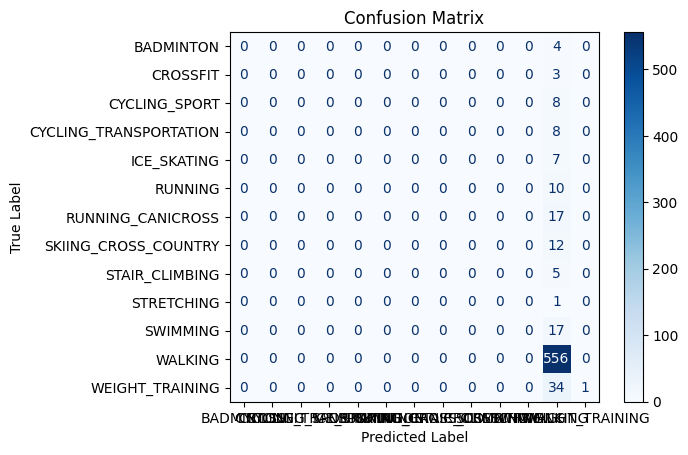

['model/DF1_SPORT_MODEL.sav']

In [401]:
#del max
DF1_SPORT_MAX_ACCURACY = max(DF1_SPORT_ACCURACY_DICT.values())
DF1_SPORT_MAX_ACCURACY_nNeighbours = max(DF1_SPORT_ACCURACY_DICT, key=DF1_SPORT_ACCURACY_DICT.get)
print(f"The number of neighbours, which is within the defined tuning parameters, generating the maximum accuracy of {DF1_SPORT_MAX_ACCURACY} is {DF1_SPORT_MAX_ACCURACY_nNeighbours}. Therefore, the selected model is the corresponding model of that accuracy.\n The model can be accessed from:")
DF1_SPORT_MODEL = DF1_SPORT_MODEL_DICT[DF1_SPORT_MAX_ACCURACY_nNeighbours]
DF1_SPORT_Ytest_pred = DF1_SPORT_Ytest_pred_DICT[DF1_SPORT_MAX_ACCURACY_nNeighbours]
DF1_SPORT_ACCURACY = DF1_SPORT_ACCURACY_DICT[DF1_SPORT_MAX_ACCURACY_nNeighbours]

plottingConfusionMatrix(DF1_SPORT_MODEL, DF1_SPORT_Xtest, DF1_SPORT_Ytest)

# Save the model to disk
DF1_SPORT_MODEL_filename = 'model/DF1_SPORT_MODEL.sav'
joblib.dump(DF1_SPORT_MODEL, DF1_SPORT_MODEL_filename)

# load the model from disk
# DF1_SPORT_MODEL = joblib.load(DF1_SPORT_MODEL_filename)
# DF1_SPORT_MODEL_result = DF1_SPORT_MODEL.score(DF1_SPORT_Xtest, DF1_SPORT_Ytest)
# print(DF1_SPORT_MODEL_result)

<a id='handsondata'></a>
<div class=" alert alert-info">
    <b>Alternative 1:</b> Model 2 - KNN Classification for time prediction
</div>

In [402]:
nNeighboursTuning = list(range(7, 50))
DF1_TIME_MODEL_DICT, DF1_TIME_Ytest_pred_DICT, DF1_TIME_ACCURACY_DICT = KNNClassify(DF1_TIME_Xtrain, DF1_TIME_Xtest, DF1_TIME_Ytrain, DF1_TIME_Ytest, nNeighboursTuning)
print("Accuracy of KNN model for predicting TIME of Alternative 1 ...\n<number of neighbours> : <accuracy>")
printDict(DF1_TIME_ACCURACY_DICT)

Accuracy of KNN model for predicting TIME of Alternative 1 ...
<number of neighbours> : <accuracy>
7  :  60.17569546120058
8  :  60.32210834553441
9  :  60.9077598828697
10  :  60.76134699853587
11  :  61.639824304538806
12  :  60.9077598828697
13  :  60.61493411420204
14  :  59.88286969253295
15  :  60.17569546120058
16  :  60.17569546120058
17  :  59.73645680819912
18  :  60.17569546120058
19  :  60.9077598828697
20  :  60.61493411420204
21  :  60.9077598828697
22  :  60.76134699853587
23  :  61.05417276720352
24  :  60.32210834553441
25  :  60.76134699853587
26  :  60.32210834553441
27  :  60.46852122986823
28  :  60.61493411420204
29  :  61.34699853587116
30  :  61.05417276720352
31  :  61.34699853587116
32  :  60.46852122986823
33  :  60.9077598828697
34  :  60.76134699853587
35  :  62.3718887262079
36  :  61.78623718887262
37  :  61.34699853587116
38  :  61.78623718887262
39  :  61.639824304538806
40  :  62.079062957540266
41  :  61.639824304538806
42  :  61.34699853587116
43  : 

The number of neighbours, which is within the defined tuning parameters, generating the maximum accuracy of 62.3718887262079 is 35. Therefore, the selected model is the corresponding model of that accuracy.
 The model can be accessed from:


c:\Users\thanh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


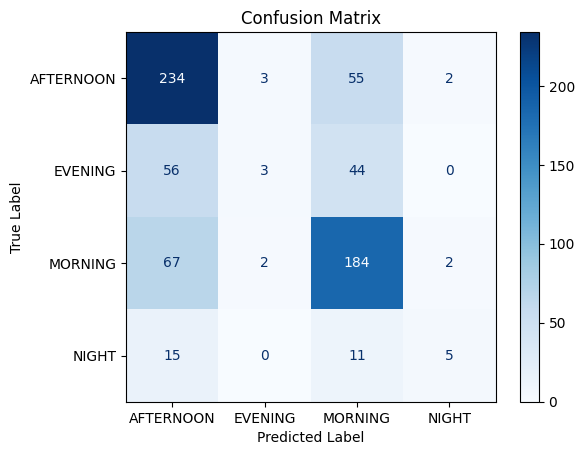

['model/DF1_TIME_MODEL.sav']

In [403]:
DF1_TIME_MAX_ACCURACY = max(DF1_TIME_ACCURACY_DICT.values())
DF1_TIME_MAX_ACCURACY_nNeighbours = max(DF1_TIME_ACCURACY_DICT, key=DF1_TIME_ACCURACY_DICT.get)
print(f"The number of neighbours, which is within the defined tuning parameters, generating the maximum accuracy of {DF1_TIME_MAX_ACCURACY} is {DF1_TIME_MAX_ACCURACY_nNeighbours}. Therefore, the selected model is the corresponding model of that accuracy.\n The model can be accessed from:")
DF1_TIME_MODEL = DF1_TIME_MODEL_DICT[DF1_TIME_MAX_ACCURACY_nNeighbours]
DF1_TIME_Ytest_pred = DF1_TIME_Ytest_pred_DICT[DF1_TIME_MAX_ACCURACY_nNeighbours]
DF1_TIME_ACCURACY = DF1_TIME_ACCURACY_DICT[DF1_TIME_MAX_ACCURACY_nNeighbours]

plottingConfusionMatrix(DF1_TIME_MODEL, DF1_TIME_Xtest, DF1_TIME_Ytest)

# Save the model to disk
DF1_TIME_MODEL_filename = 'model/DF1_TIME_MODEL.sav'
joblib.dump(DF1_TIME_MODEL, DF1_TIME_MODEL_filename)

<a id='handsondata'></a>
<div class=" alert alert-info">
    <b>Alternative 1:</b> Model 3 - Linear Regression for duration prediction
</div>

In [405]:
def LinearRegress(Xtrain, Xtest, Ytrain, Ytest):
    model = Ridge(alpha = 1)
    model.fit(Xtrain, Ytrain)

    coefficient  = model.score(Xtrain, Ytrain)
    print(f"coefficient of determination: {coefficient}")

    print(f"intercept: {model.intercept_}")

    print(f"slope: {model.coef_}")

    Ytest_pred = model.predict(Xtest)
    print(f"predicted response:\n{Ytest_pred}")

    accuracy = r2_score(Ytest, Ytest_pred)
    print(f"Accuracy is {accuracy}")

    mean_absolut_error = mean_absolute_error(Ytest, Ytest_pred)
    print(f"mean_absolute_error is {mean_absolut_error}")

    mean_square_error = mean_squared_error(Ytest, Ytest_pred)
    print(f"mean_squared_error is {mean_square_error}")

    pred_df = pd.DataFrame({'Actual': Ytest, 'Predicted': Ytest_pred})
    display(pred_df)

LinearRegress(DF1_DUR_Xtrain, DF1_DUR_Xtest, DF1_DUR_Ytrain, DF1_DUR_Ytest)

coefficient of determination: 0.16397334708287825
intercept: 1391.6303819143823
slope: [-5.11826514e+02  7.09485467e+02 -3.52140691e+02 -7.02358479e+02
 -1.16682957e+03 -1.13862569e+03  3.03376913e+02  7.53037314e+02
 -6.94350237e+02 -1.00120928e+02  1.11022136e+03  3.08299006e+02
  4.07587259e+02  6.81938474e+01  8.13123840e+02  1.88491560e+02
 -2.22609260e+02  3.43082199e+01 -9.20222474e+02 -7.98427888e+02
 -4.98370670e+02 -3.77672516e+02 -3.00217675e+02 -1.77781738e+02
  5.39438872e+02 -1.78875396e+02 -1.16462125e+02  4.36347797e+02
 -3.16108299e+02 -2.77686424e+02 -1.00533218e+03 -6.07544135e+02
 -6.13309494e+02 -8.06718454e+02 -8.06836391e+02  1.37328460e+02
 -6.40382144e+02 -8.37103069e+02 -3.45109346e+02  4.35525849e+01
  8.73970058e+01  9.33451436e+02 -1.89398856e+02  2.93107233e+02
 -2.04296522e+02 -2.83144832e+02 -6.84586987e+01 -5.18203980e+02
 -1.10057884e+03  6.92273098e+02 -1.70618071e+02 -3.74515257e+02
 -5.23127034e+00 -6.05534745e+02  4.86065614e+02  2.04188340e+02
  7

,Actual,Predicted
0,1167,1415.459363
1,2401,2846.126406
2,3022,2157.078653
3,2251,1928.921467
4,2151,3192.499242
...,...,...
678,1897,2215.065310
679,2700,2533.357333
680,2962,2029.782823
681,3243,2340.123580


<a id='handsondata'></a>
<div class=" alert alert-info">
    <b>Alternative 2:</b> Model 1 - KNN Classification for sport prediction
</div>

<a id='handsondata'></a>
<div class=" alert alert-info">
    <b>Alternative 2:</b> Model 2 - KNN Classification for time prediction
</div>

<a id='handsondata'></a>
<div class=" alert alert-info">
    <b>Alternative 2:</b> Model 3 - Linear Regression for duration prediction
</div>